In [49]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn import preprocessing
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score

import matplotlib
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
seed = 100

%matplotlib inline

1. Carga del conjunto de datos

In [50]:
# Cargamos los datos del dataset
df_co2 = pd.read_csv('CEIP_LAlbea_co2.csv')

# Separamos el conjunto de datos
X = df_co2.drop('co2', axis = 1)
y = df_co2['co2']

# Mostramos el numero de filas del dataset
print("Numero de filas del dataset:", df_co2.shape[0])

# Mostramos el numero de atributos descriptivos del dataset
print("Numero de atributos descriptivos del dataset:", X.shape[1])

# Mostramos el nombre de los atributos descriptivos del dataset
print("Nombre de los atributos descriptivos del dataset:", X.columns.tolist())

Numero de filas del dataset: 26496
Numero de atributos descriptivos del dataset: 11
Nombre de los atributos descriptivos del dataset: ['sensor_id', 'date_time', 'temp', 'hum', 'bat', 'grade', 'number_students', 'metres', 'windows', 'doors', 'orientation']


In [53]:
# Mostramos la descripcion del dataset
df_co2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26496 entries, 0 to 26495
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   sensor_id        26496 non-null  object  
 1   date_time        26496 non-null  object  
 2   temp             26496 non-null  float64 
 3   hum              26496 non-null  float64 
 4   co2              26496 non-null  int64   
 5   bat              26496 non-null  float64 
 6   grade            26496 non-null  object  
 7   number_students  26496 non-null  category
 8   metres           26496 non-null  float64 
 9   windows          26496 non-null  category
 10  doors            26496 non-null  category
 11  orientation      26496 non-null  object  
dtypes: category(3), float64(4), int64(1), object(4)
memory usage: 1.9+ MB


In [52]:
# Modificamos el tipo de dato a las variables numéricas que identificamos como categóricas
df_co2['number_students'] = df_co2['number_students'].astype('category')
df_co2['metres'] = df_co2['metres'].astype('category')
df_co2['windows'] = df_co2['windows'].astype('category')
df_co2['doors'] = df_co2['doors'].astype('category')

2. Análisis de los datos

Variables categóricas:

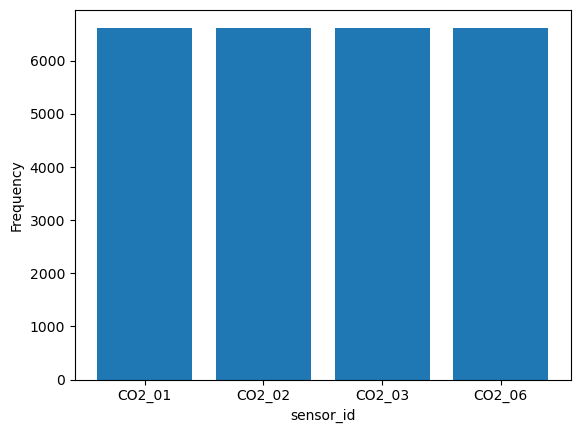

In [54]:
# Analizamos la variable categórica sensor_id
# Calculamos las frecuencias
freq_sensor_id = df_co2['sensor_id'].value_counts()

# Generamos el grafico de barras de la variable sensor_id
plt.bar(freq_sensor_id.index.values, freq_sensor_id)

# Añadimos las etiquetas de eje
plt.ylabel('Frequency')
plt.xlabel("sensor_id")

# Mostramos el gráfico
plt.show();

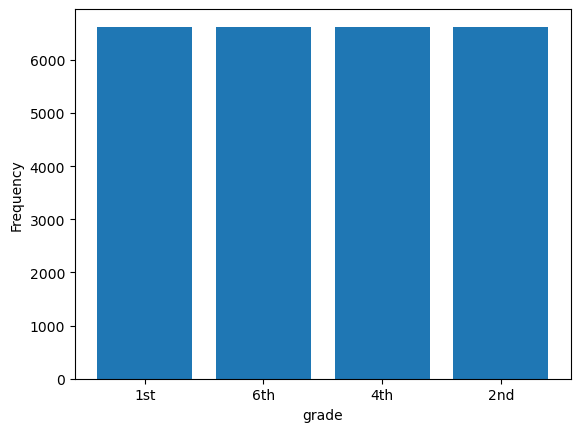

In [55]:
# Analizamos la variable categórica grade
# Calculamos las frecuencias
freq_grade = df_co2['grade'].value_counts()

# Generamos el grafico de barras de la variable grade
plt.bar(freq_grade.index.values, freq_grade)

# Añadimos las etiquetas de eje
plt.ylabel('Frequency')
plt.xlabel("grade")

# Mostramos el gráfico
plt.show();

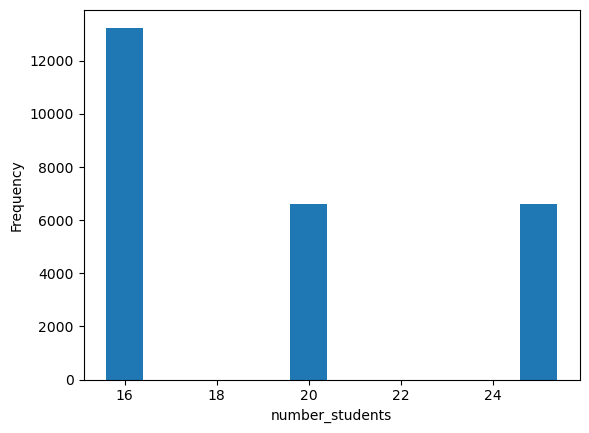

In [56]:
# Analizamos la variable categórica number_students
# Calculamos las frecuencias
freq_number_students = df_co2['number_students'].value_counts()

# Generamos el grafico de barras de la variable number_students
plt.bar(freq_number_students.index.values, freq_number_students)

# Añadimos las etiquetas de eje
plt.ylabel('Frequency')
plt.xlabel("number_students")

# Mostramos el gráfico
plt.show();

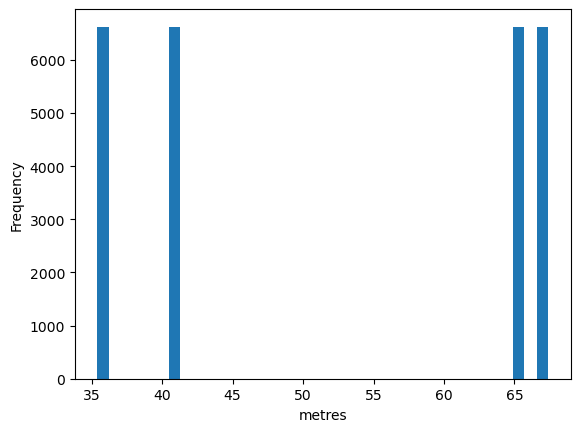

In [87]:
# Analizamos la variable categórica metres
# Calculamos las frecuencias
freq_metres = df_co2['metres'].value_counts()

# Generamos el grafico de barras de la variable metres
plt.bar(freq_metres.index.values, freq_metres)

# Añadimos las etiquetas de eje
plt.ylabel('Frequency')
plt.xlabel("metres")

# Mostramos el gráfico
plt.show();

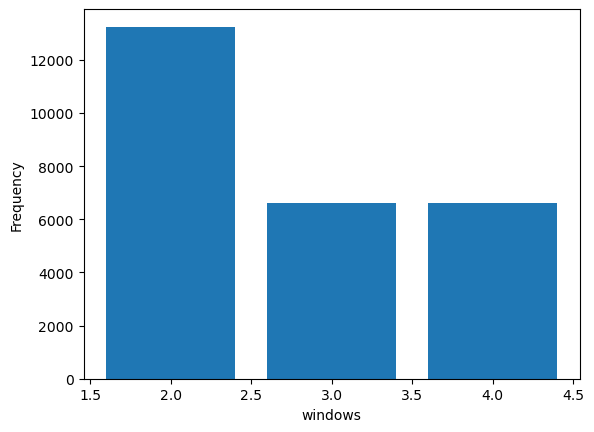

In [57]:
# Analizamos la variable categórica windows
# Calculamos las frecuencias
freq_windows = df_co2['windows'].value_counts()

# Generamos el grafico de barras de la variable windows
plt.bar(freq_windows.index.values, freq_windows)

# Añadimos las etiquetas de eje
plt.ylabel('Frequency')
plt.xlabel("windows")

# Mostramos el gráfico
plt.show();

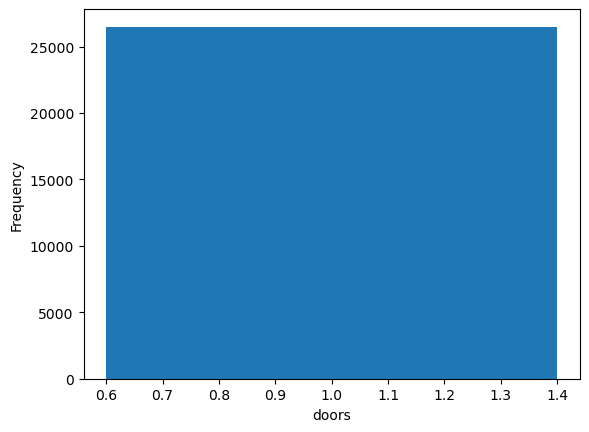

In [58]:
# Analizamos la variable categórica doors
# Calculamos las frecuencias
freq_doors = df_co2['doors'].value_counts()

# Generamos el grafico de barras de la variable doors
plt.bar(freq_doors.index.values, freq_doors)

# Añadimos las etiquetas de eje
plt.ylabel('Frequency')
plt.xlabel("doors")

# Mostramos el gráfico
plt.show();

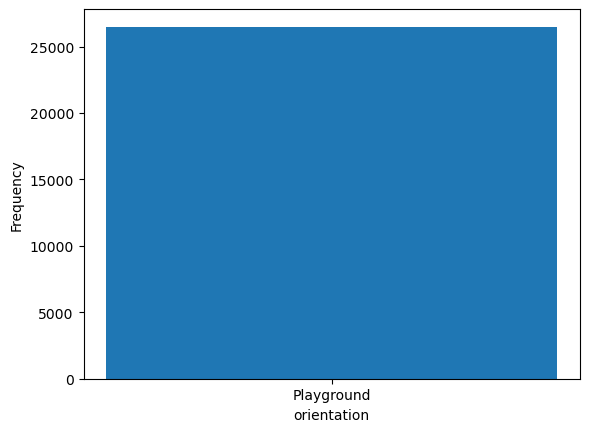

In [59]:
# Analizamos la variable categórica orientation
# Calculamos las frecuencias
freq_month = df_co2['orientation'].value_counts()

# Generamos el grafico de barras de la variable month
plt.bar(freq_month.index.values, freq_month)

# Añadimos las etiquetas de eje
plt.ylabel('Frequency')
plt.xlabel("orientation")

# Mostramos el gráfico
plt.show();

Podemos observar como las variables 'doors' y 'orientation' solo contienen un único valor, por lo que prescindiremos de ellas para el análisis predictivo, puesto que una variable con un solo nivel no varía y, por lo tanto, no aporta información útil que contribuya a la capacidad predictiva del modelo.

In [60]:
df_co2_mod = df_co2.drop(['doors', 'orientation'], axis = 1)

Variables numéricas

In [62]:
# Analizamos las variables numéricas
# Calculamos los estadisticos eliminando las variables categóricas
X.drop(columns = ['sensor_id', 'date_time', 'grade', 'number_students', 'metres', 'windows', 'doors', 'orientation']).describe()

,temp,hum,bat,metres
count,26496.000000,26496.000000,26496.000000,26496.000000
mean,30.115663,44.027370,94.350881,52.250000
std,1.729078,6.665978,13.624745,14.029609
min,22.600000,21.120000,0.000000,35.800000
25%,28.990000,40.097500,95.760000,39.625000
50%,30.030000,44.910000,96.340000,53.100000
75%,31.332500,48.760000,98.830000,65.725000
max,39.550000,64.180000,100.000000,67.000000


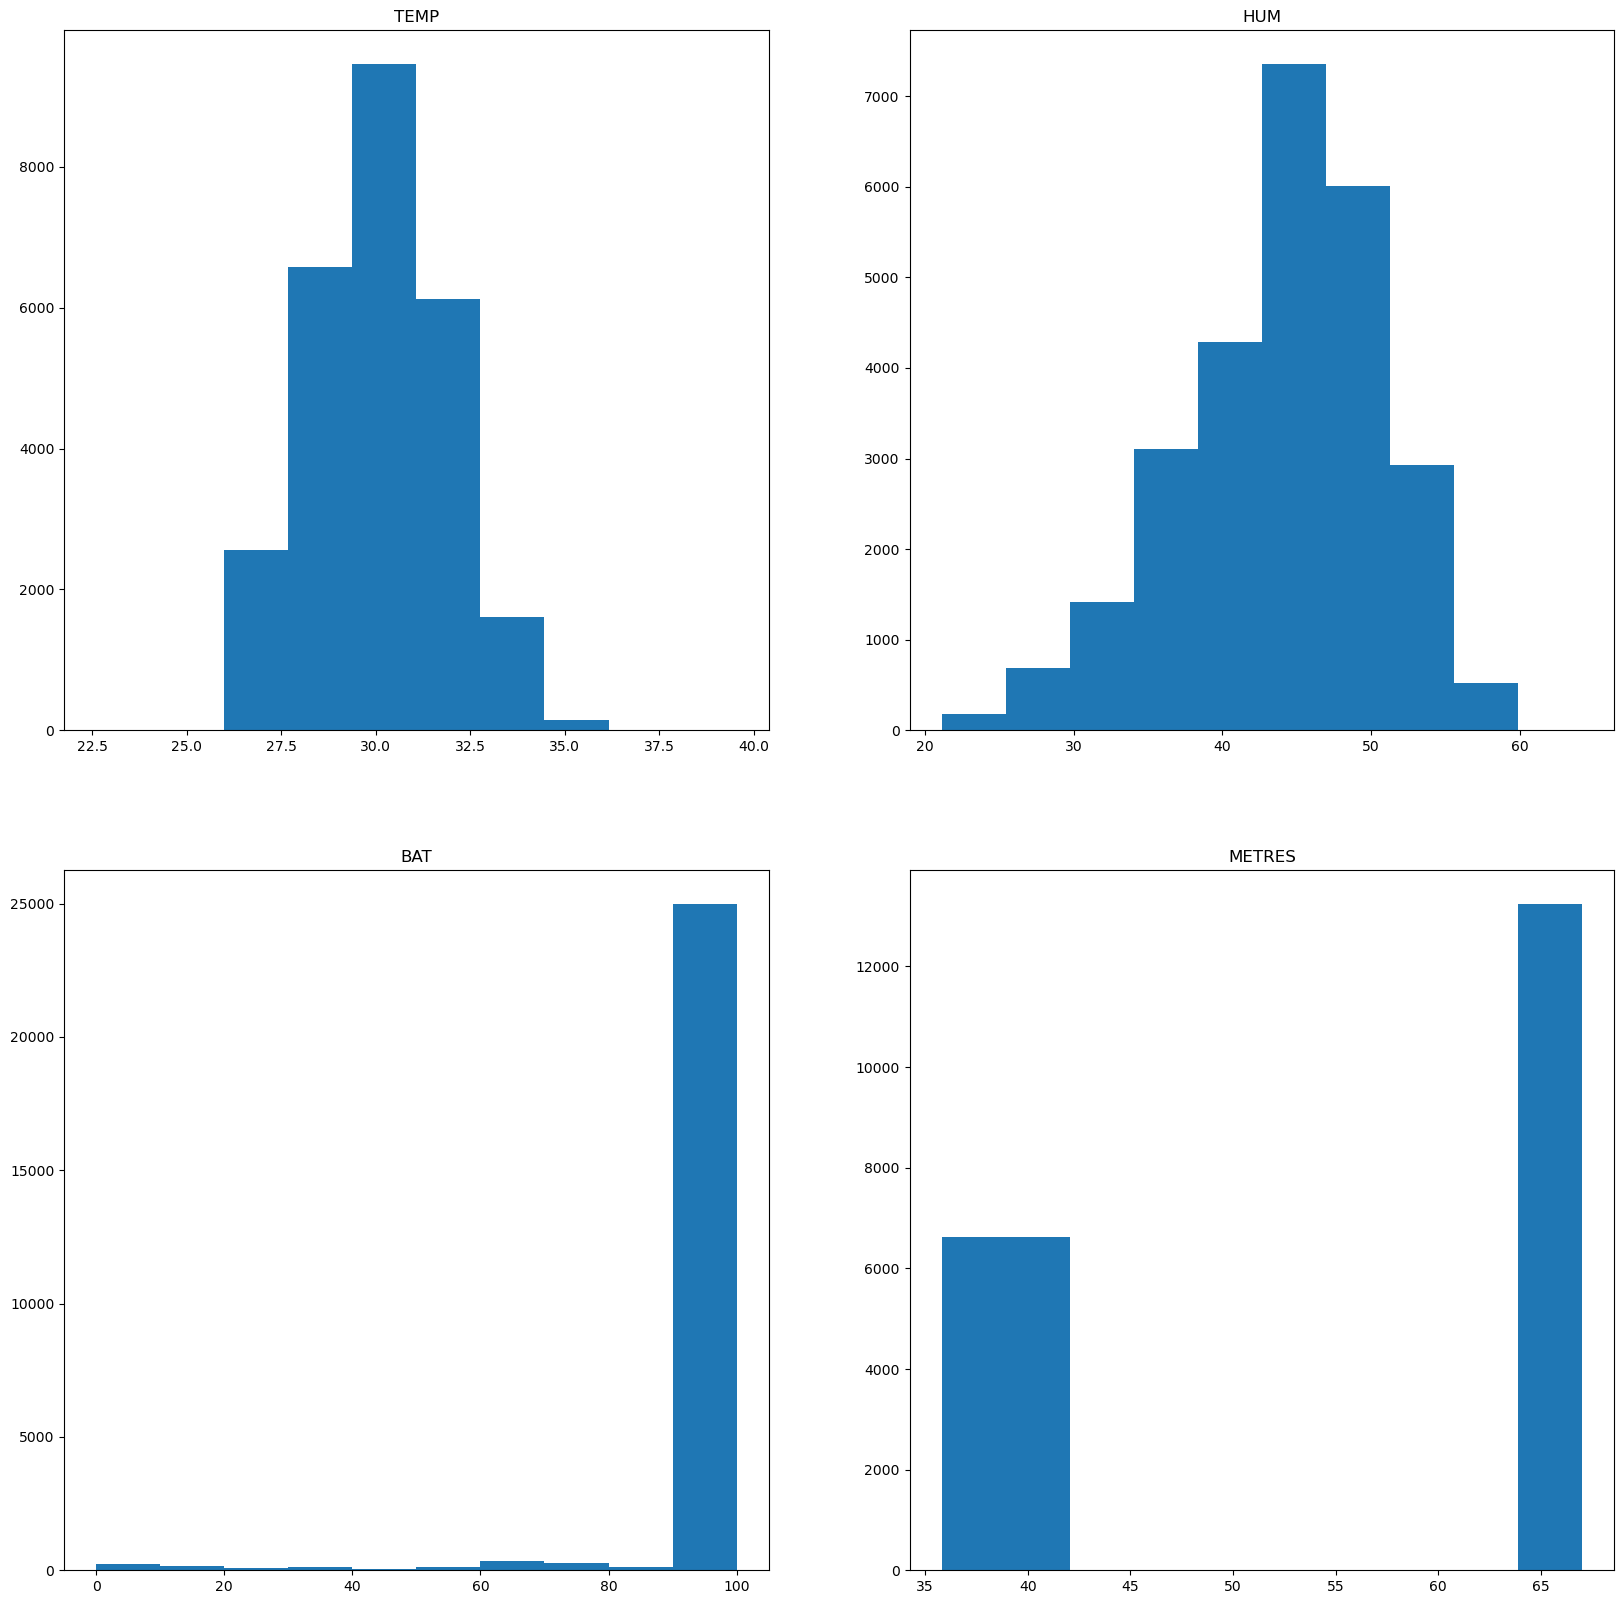

In [63]:
# Dibujamos el histograma de valores de las variables numéricas
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (20, 20))
ax = ax.flatten()

for i, feature in enumerate(X.drop(columns = ['sensor_id', 'date_time', 'grade', 'number_students', 'metres', 'windows', 'doors', 'orientation']).columns):
    ax[i].hist(X[feature])
    ax[i].set_title(feature.upper())

Entre las variables numéricas, se obserba una distribución uniforme en las variables 'temp' y 'hum', mientras que en el resto de variables no ocurre.

2.2 Análisis exploratorio de los datos

In [65]:
# Generamos variables que indican los diferentes tipos de atributos con los que vamos a trabajar
v_objetivo = 'co2'
a_categoricos = ['sensor_id', 'grade', 'number_students', 'metres', 'windows']
a_numericos = ['temp', 'hum', 'co2', 'bat']

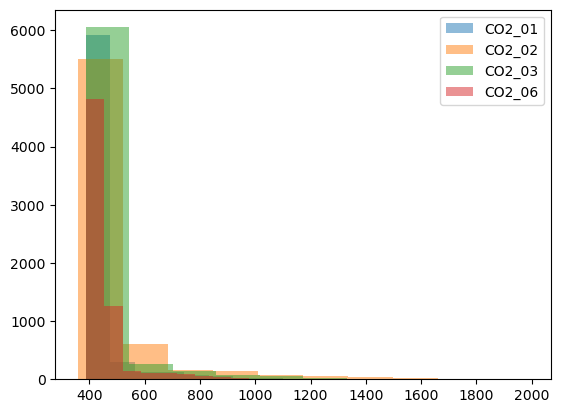

In [66]:
# Crear histogramas para cada categoría
# Creamos un gráfico
fig, ax = plt.subplots()

# Identificamos cada valor único
for sensor_id in df_co2_mod['sensor_id'].unique():
    data = df_co2_mod[df_co2_mod['sensor_id'] == sensor_id]['co2']
    ax.hist(data, alpha = 0.5, label = sensor_id)

# Añadimos la barra con la leyenda de las diferentes categorias
ax.legend()

# Mostramos el gráfico
plt.show()

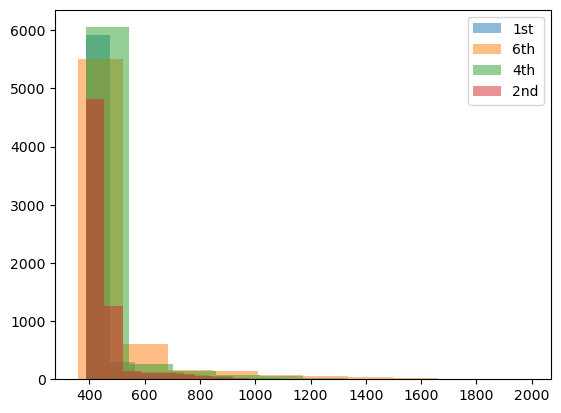

In [68]:
# Crear histogramas para cada categoría
# Creamos un gráfico
fig, ax = plt.subplots()

# Identificamos cada valor único
for grade in df_co2_mod['grade'].unique():
    data = df_co2_mod[df_co2_mod['grade'] == grade]['co2']
    ax.hist(data, alpha = 0.5, label = grade)

# Añadimos la barra con la leyenda de las diferentes categorias
ax.legend()

# Mostramos el gráfico
plt.show()

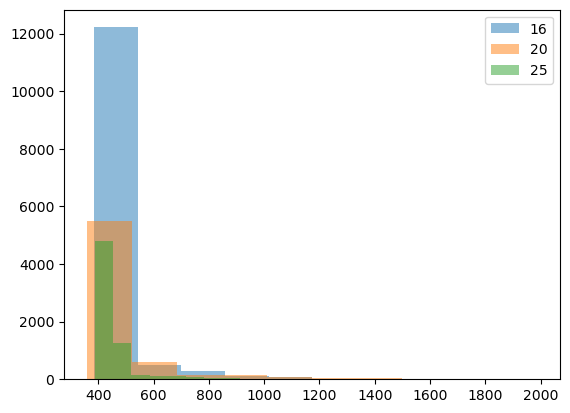

In [69]:
# Crear histogramas para cada categoría
# Creamos un gráfico
fig, ax = plt.subplots()

# Identificamos cada valor único
for number_students in df_co2_mod['number_students'].unique():
    data = df_co2_mod[df_co2_mod['number_students'] == number_students]['co2']
    ax.hist(data, alpha = 0.5, label = number_students)

# Añadimos la barra con la leyenda de las diferentes categorias
ax.legend()

# Mostramos el gráfico
plt.show()

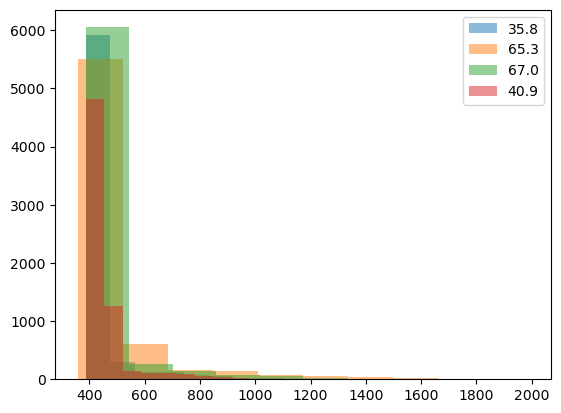

In [79]:
# Crear histogramas para cada categoría
# Creamos un gráfico
fig, ax = plt.subplots()

# Identificamos cada valor único
for metres in df_co2_mod['metres'].unique():
    data = df_co2_mod[df_co2_mod['metres'] == metres]['co2']
    ax.hist(data, alpha = 0.5, label = metres)

# Añadimos la barra con la leyenda de las diferentes categorias
ax.legend()

# Mostramos el gráfico
plt.show()

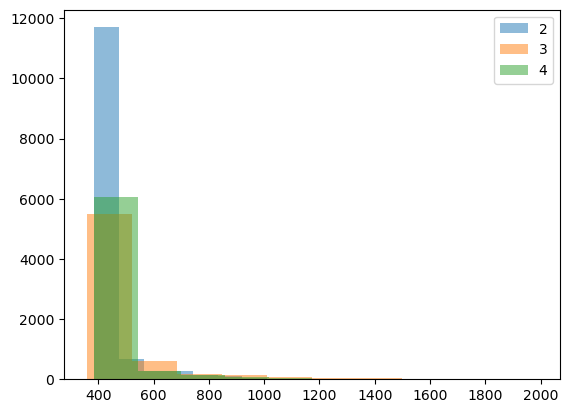

In [70]:
# Crear histogramas para cada categoría
# Creamos un gráfico
fig, ax = plt.subplots()

# Identificamos cada valor único
for windows in df_co2_mod['windows'].unique():
    data = df_co2_mod[df_co2_mod['windows'] == windows]['co2']
    ax.hist(data, alpha = 0.5, label = windows)

# Añadimos la barra con la leyenda de las diferentes categorias
ax.legend()

# Mostramos el gráfico
plt.show()

In [80]:
# Calculamos la media y desviación estándar de "co2" para cada categoría
print("sensor_id:")
for sensor_id in X["sensor_id"].unique():
    co2 = df_co2_mod.loc[df_co2_mod["sensor_id"]==sensor_id, "co2"]
    print(f" - {sensor_id}: {np.mean(co2)} +/-{np.std(co2)}")

print("grade:")
for grade in X["grade"].unique():
    co2 = df_co2_mod.loc[df_co2_mod["grade"]==grade, "co2"]
    print(f" - {grade}: {np.mean(co2)} +/-{np.std(co2)}")
    
print("number_students:")
for number_students in X["number_students"].unique():
    co2 = df_co2_mod.loc[df_co2_mod["number_students"]==number_students, "co2"]
    print(f" - {number_students}: {np.mean(co2)} +/-{np.std(co2)}")

print("metres:")
for metres in X["metres"].unique():
    co2 = df_co2_mod.loc[df_co2_mod["metres"]==metres, "co2"]
    print(f" - {metres}: {np.mean(co2)} +/-{np.std(co2)}")

print("windows:")
for windows in X["windows"].unique():
    co2 = df_co2_mod.loc[df_co2_mod["windows"]==windows, "co2"]
    print(f" - {windows}: {np.mean(co2)} +/-{np.std(co2)}")    

sensor_id:
 - CO2_01: 443.1366243961353 +/-85.95678416038268
 - CO2_02: 494.3707729468599 +/-181.26724446603893
 - CO2_03: 456.65942028985506 +/-128.3448891678565
 - CO2_06: 461.3333333333333 +/-76.29914469164353
grade:
 - 1st: 443.1366243961353 +/-85.95678416038268
 - 6th: 494.3707729468599 +/-181.26724446603893
 - 4th: 456.65942028985506 +/-128.3448891678565
 - 2nd: 461.3333333333333 +/-76.29914469164353
number_students:
 - 16: 449.89802234299515 +/-109.4358540952094
 - 20: 494.3707729468599 +/-181.26724446603893
 - 25: 461.3333333333333 +/-76.29914469164353
metres:
 - 35.8: 443.1366243961353 +/-85.95678416038268
 - 65.3: 494.3707729468599 +/-181.26724446603893
 - 67.0: 456.65942028985506 +/-128.3448891678565
 - 40.9: 461.3333333333333 +/-76.29914469164353
windows:
 - 2: 452.2349788647343 +/-81.7792404340607
 - 3: 494.3707729468599 +/-181.26724446603893
 - 4: 456.65942028985506 +/-128.3448891678565


In [81]:
# Calculamos la correlacion de los atributos numéricos
corr_all = df_co2_mod.drop(columns=["sensor_id", "date_time", "grade", "number_students", "metres", "windows"]).corr()

# Representamos graficamente la correlacion
corr_all.style.background_gradient(cmap='coolwarm').format(precision=2)

,temp,hum,co2,bat
temp,1.00,-0.67,0.05,0.31
hum,-0.67,1.00,0.12,-0.14
co2,0.05,0.12,1.00,-0.10
bat,0.31,-0.14,-0.10,1.00


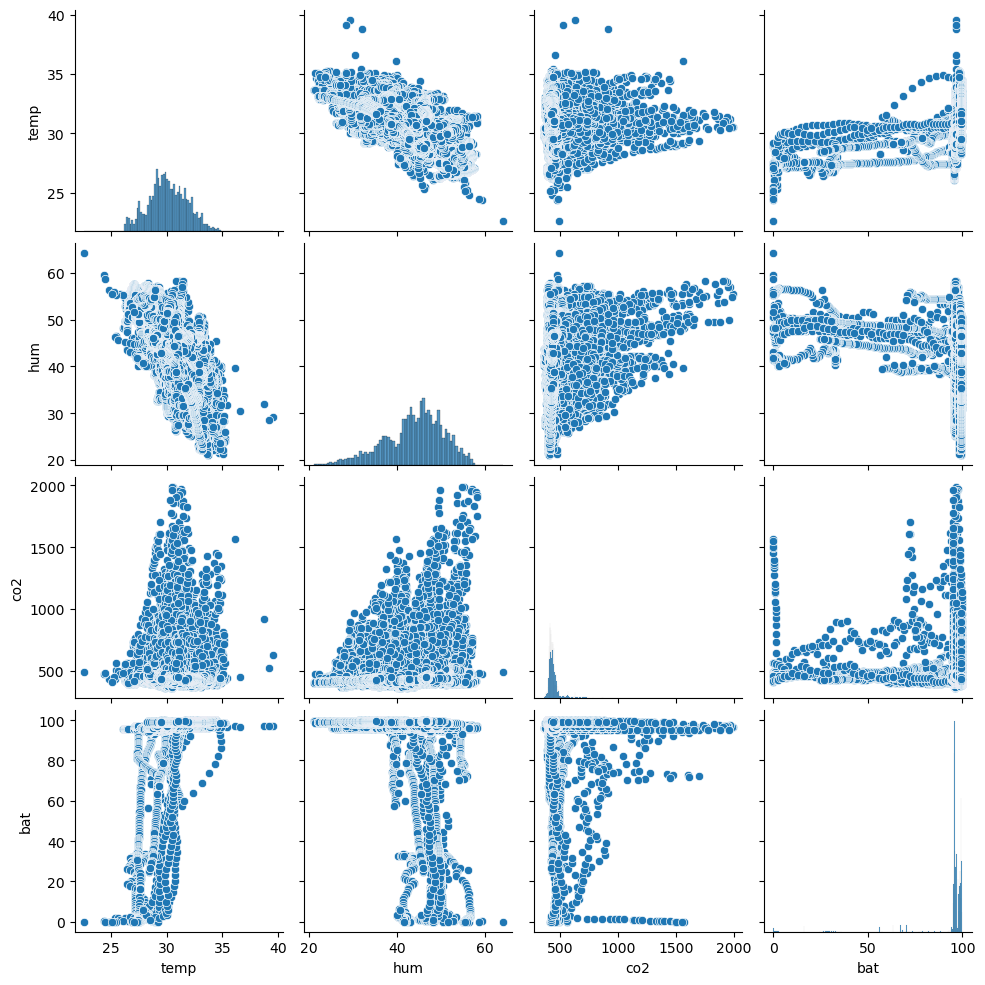

In [82]:
sns.pairplot(df_co2_mod.drop(columns=["sensor_id", "date_time", "grade", "number_students", "metres", "windows"]))

In [84]:
# Identificamos las dos columnas con la correlación más fuerte y las dos más débiles
corr_fuerte = corr_all['co2'].abs().nlargest(2)[1:]
corr_debil = corr_all['co2'].abs().nsmallest(1)

# Mostramos los resultados
print("Atributos con la correlación más fuerte:\n", corr_fuerte)
print("\nAtributos con la correlación más débil:\n", corr_debil)

Atributos con la correlación más fuerte:
 hum    0.120926
Name: co2, dtype: float64

Atributos con la correlación más débil:
 temp    0.053084
Name: co2, dtype: float64


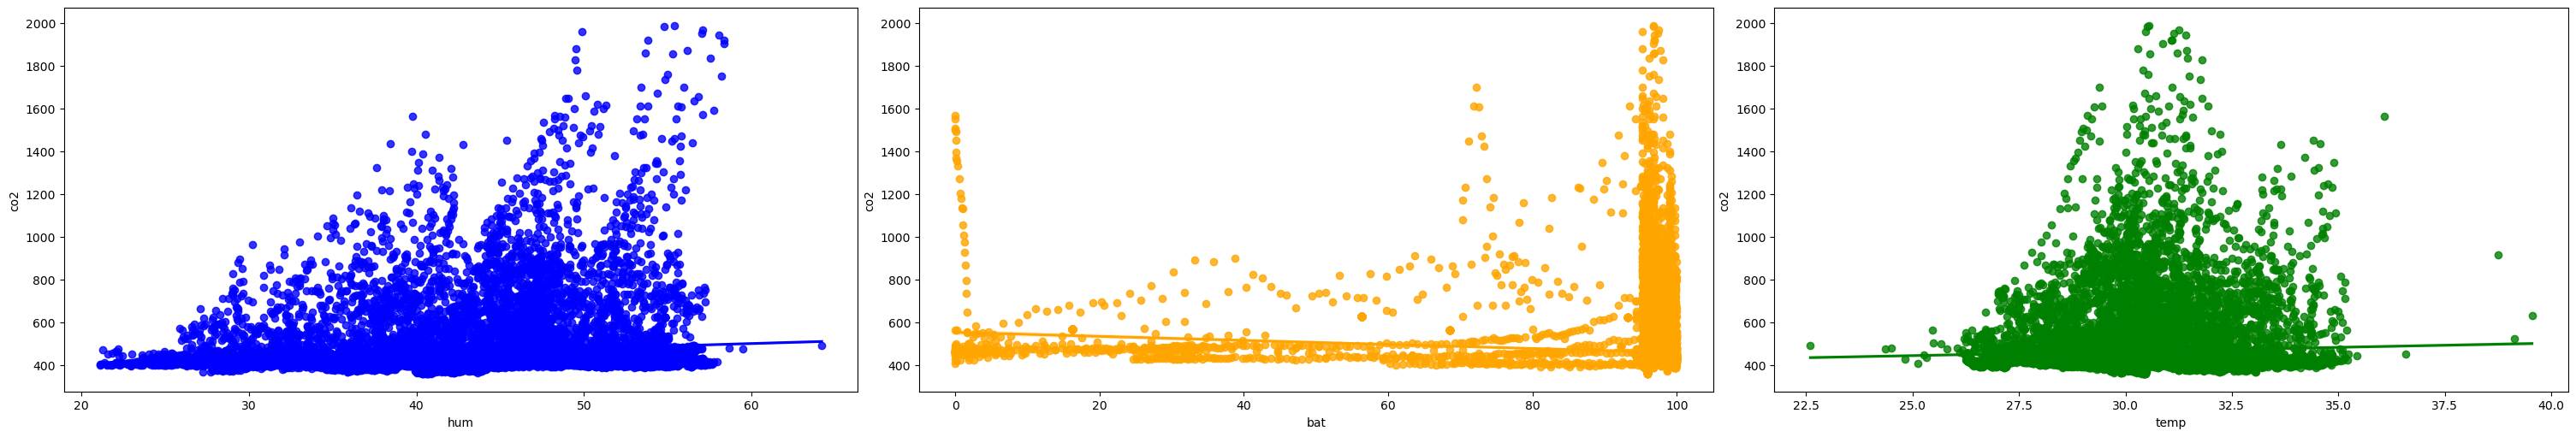

In [85]:
# Definimos los atributos y colores que vamos a emplear
atributos = ["hum", "bat", "temp"]
colores = ["blue", "orange", "green"]

# Dibujamos las correlaciones con la regresion lineal
fig, axs = plt.subplots(ncols = 3, nrows = 1, figsize = (30, 5))
axs = axs.flatten()

for i, k in enumerate(atributos):
    sns.regplot(y = df_co2_mod[v_objetivo], x = df_co2_mod[k], ax = axs[i], color = colores[i])

plt.tight_layout(pad = 0.3, w_pad = 0.5, h_pad = 0.5)

3. Preprocesado de los datos